<a href="https://colab.research.google.com/github/MussaddikKhan/Data-Science-College-Practicals-/blob/main/Experiment_No_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment – 4**  
**Date:**  
**Roll No.: 24201013**  
**Title:** *Decision Tree Classifier*

---

## **Theory**

A **Decision Tree** is a supervised machine learning algorithm used for both **classification** and **regression** tasks. It splits the dataset into smaller subsets based on the values of input features, forming a tree-like structure.  

- The **root node** contains the full dataset  
- **Branches** represent decisions  
- **Leaf nodes** represent final output classes  

At each level, the algorithm chooses the **best feature** to split the data. This selection is based on impurity/entropy reduction using metrics such as:

---

## **1. Entropy**

Entropy measures the impurity or randomness in the dataset.

<br>

$$
H(S) = -\sum_{i=1}^{n} p_i \; \log_2(p_i)
$$

<br>

Where:  
- \( p_i \) = probability of class *i*

---

## **2. Information Gain**

Information Gain tells how much uncertainty is reduced after splitting the dataset.

<br>

$$
IG = H(\text{parent}) - \sum \left( \frac{|child|}{|parent|} \times H(\text{child}) \right)
$$

<br>

Higher Information Gain → better feature for splitting.

---

## **3. Gini Index**

Gini Index measures impurity; lower Gini means purer node.

<br>

$$
Gini(S) = 1 - \sum_{i=1}^{n} p_i^2
$$

<br>

---

## **How Decision Trees Work (Step-wise Explanation)**

### **Step 1 — Load and prepare dataset**  
Separate input features (X) and output labels (y).

### **Step 2 — Select a splitting metric**  
Common choices:
- Entropy (uses Information Gain)  
- Gini Index  

### **Step 3 — Split the data**  
Choose the feature that reduces impurity the most.

### **Step 4 — Continue splitting**  
Recursively repeat until:
- All samples belong to the same class  
- No more useful split is possible

### **Step 5 — Make predictions**  
Traverse the tree based on feature values until reaching a leaf node.

### **Step 6 — Visualize the tree**  
Decision Trees can be plotted for easy interpretation.

---

## **Advantages**
- Easy to understand and visualize  
- Handles both numeric and categorical data  
- Works well even without scaling  

## **Disadvantages**
- Can overfit if tree is too deep  
- Sensitive to noisy/inconsistent data  
- Small changes in data can change the entire tree  

---


Can play tennis?: No


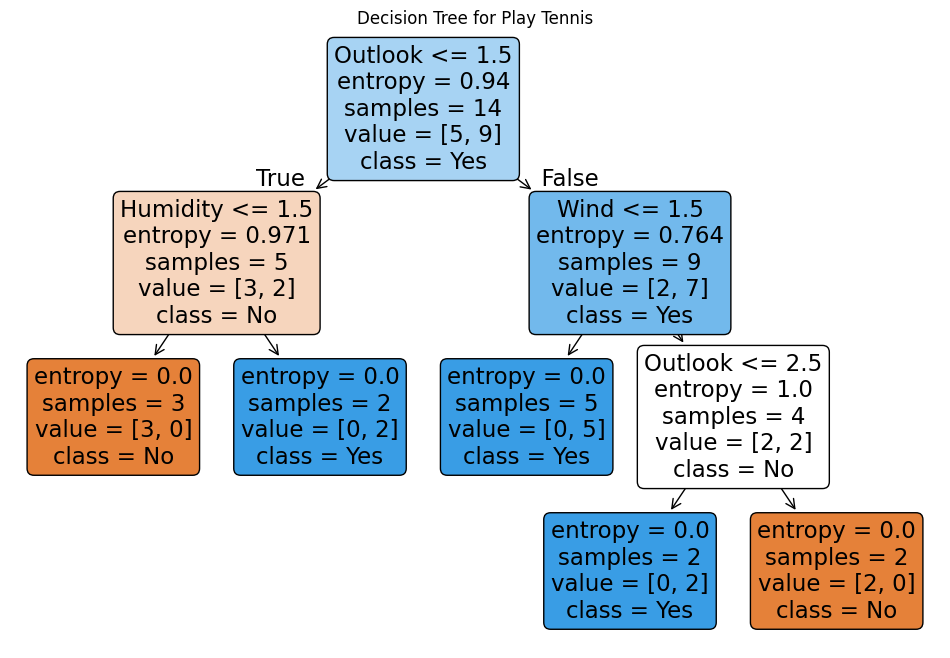

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ---------------------------------------
# Step 1: Training Data
# Each row: [Outlook, Temperature, Humidity, Wind, PlayTennis]
# ---------------------------------------
train_data = [
    [1, 1, 1, 1, 0],
    [1, 1, 1, 2, 0],
    [2, 1, 1, 1, 1],
    [3, 2, 1, 1, 1],
    [3, 3, 2, 1, 1],
    [3, 3, 2, 2, 0],
    [2, 3, 2, 2, 1],
    [1, 2, 1, 1, 0],
    [1, 3, 2, 1, 1],
    [3, 2, 1, 1, 1],
    [1, 2, 2, 2, 1],
    [2, 2, 1, 2, 1],
    [2, 1, 2, 1, 1],
    [3, 2, 1, 2, 0]
]

# ---------------------------------------
# Step 2: Split into features and labels
# ---------------------------------------
X_train = [row[:-1] for row in train_data]  # features
y_train = [row[-1] for row in train_data]   # labels

# ---------------------------------------
# Step 3: Train the Decision Tree
# ---------------------------------------
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# ---------------------------------------
# Step 4: Prediction function
# ---------------------------------------
def predict_tennis(outlook, temp, humidity, wind):
    test = [[outlook, temp, humidity, wind]]
    prediction = clf.predict(test)[0]
    return "Yes" if prediction == 1 else "No"

# Example prediction
result = predict_tennis(1, 2, 1, 2)
print("Can play tennis?:", result)

# ---------------------------------------
# Step 5: Visualize the Decision Tree
# ---------------------------------------
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=["Outlook", "Temperature", "Humidity", "Wind"],
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Play Tennis")
plt.show()
